## High-Coverage COGs and Ribosomal Protein COG Network Structures

In [1]:
import os
import sys
sys.path.insert(0, '../common')

import settings
import util

from tqdm import tqdm
import numpy as np

import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)
plt.ion()

In [60]:
# can't return a matrix -- would be too sparse
# will return dictionary instead
def read_cog_links(location = settings.COG_LINKS):
    f = open(location, 'r')
    association_mapping = {}
    
    progress = tqdm(total = util.count_lines(location))
    
    first = True
    for line in f:
        if first:
            first = False
            progress.update(1)
            continue
        else:
            line = line.strip('\n').split(' ')
            cog_1 = line[0]
            cog_2 = line[1]
            ascore = int(line[2])
            
            if line[0] in association_mapping:
                association_mapping[cog_1].append([cog_2, ascore])
            else:
                association_mapping[cog_1] = [[cog_2, ascore]]
            
            if line[1] in association_mapping:
                association_mapping[cog_2].append([cog_1, ascore])
            else:
                association_mapping[cog_2] = [[cog_1, ascore]]

            progress.update(1)
        
    return association_mapping

In [61]:
association_mapping = read_cog_links()

100%|██████████| 17990425/17990425 [01:59<00:00, 150590.36it/s]


In [62]:
association_mapping['COG0196']

[['COG0001', 856],
 ['COG0005', 246],
 ['COG0006', 160],
 ['COG0007', 215],
 ['COG0008', 358],
 ['COG0009', 207],
 ['COG0010', 313],
 ['COG0013', 366],
 ['COG0014', 168],
 ['COG0015', 765],
 ['COG0016', 751],
 ['COG0017', 468],
 ['COG0018', 861],
 ['COG0019', 345],
 ['COG0020', 810],
 ['COG0021', 158],
 ['COG0023', 209],
 ['COG0024', 290],
 ['COG0027', 257],
 ['COG0028', 199],
 ['COG0029', 250],
 ['COG0030', 261],
 ['COG0031', 381],
 ['COG0036', 159],
 ['COG0037', 566],
 ['COG0038', 194],
 ['COG0040', 416],
 ['COG0041', 247],
 ['COG0042', 245],
 ['COG0044', 196],
 ['COG0045', 144],
 ['COG0048', 524],
 ['COG0049', 143],
 ['COG0050', 792],
 ['COG0051', 260],
 ['COG0052', 851],
 ['COG0054', 999],
 ['COG0055', 683],
 ['COG0056', 128],
 ['COG0057', 139],
 ['COG0059', 227],
 ['COG0060', 993],
 ['COG0061', 969],
 ['COG0063', 238],
 ['COG0065', 394],
 ['COG0066', 416],
 ['COG0067', 221],
 ['COG0069', 218],
 ['COG0070', 221],
 ['COG0071', 355],
 ['COG0072', 299],
 ['COG0073', 295],
 ['COG0074',

In [63]:
h = []
for i in sorted(association_mapping['COG0197'], key = lambda x: int(x[1]), reverse=True):
    h.append(int(i[1]))

(array([ 2554.,  1450.,   672.,   490.,   324.,   218.,   200.,   148.,
          174.,   456.]),
 array([ 124. ,  211.5,  299. ,  386.5,  474. ,  561.5,  649. ,  736.5,
         824. ,  911.5,  999. ]),
 <a list of 10 Patch objects>)

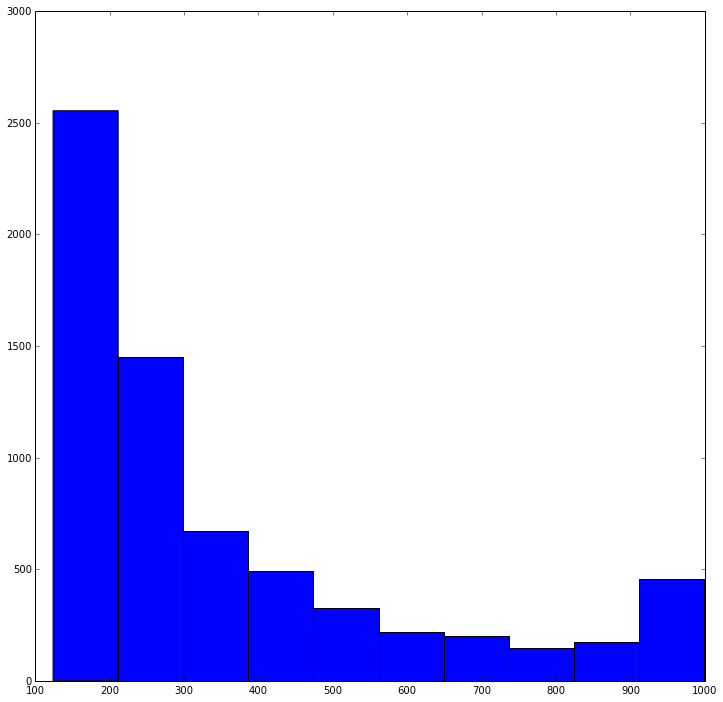

In [64]:
plt.hist(h)
# seems like a good cutoff for similarity is ~800

ERROR! Session/line number was not unique in database. History logging moved to new session 40


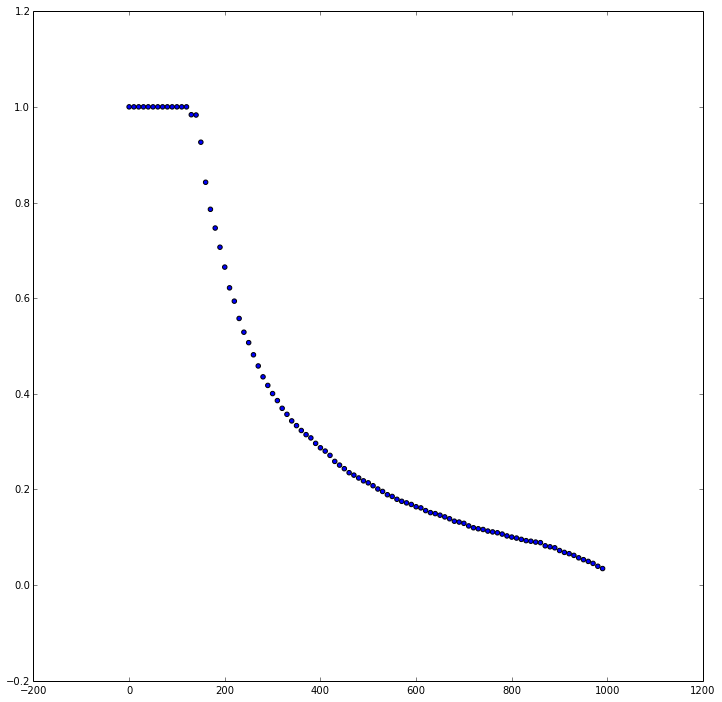

In [74]:
x = [10 * i for i in range(0, 100)]
y = [len([i for i in association_mapping['COG0197'] if i[1] >= j]) * 1. / len(h) for j in x]

plt.scatter(x, y)
#over800 = [i for i in association_mapping['COG0197'] if i[1] >= 800]
#(len(over800) * 1.) / len(h)